### Regression Analysis with scikit-learn

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Fetch the dataset
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
# Create a Pandas DataFrame
housingDF = pd. DataFrame(housing.data, columns = housing.feature_names)
housingDF.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [4]:
# Get descriptive statistics and transpose the result
housingDF.describe().T

count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Population  1166.000000  1725.000000  35682.000000  
AveOccup       2.818116     3.282261   1243.333333  
Latitude      34.260000    37.710000     41.950000  
Longitude   -118.490000  -118.010000   -114.310000

In [5]:
np.set_printoptions(precision = 2, linewidth = 120, suppress = True, edgeitems = 7) # Set numpy options
print(housing.data)

[[   8.33   41.      6.98    1.02  322.      2.56   37.88 -122.23]
 [   8.3    21.      6.24    0.97 2401.      2.11   37.86 -122.22]
 [   7.26   52.      8.29    1.07  496.      2.8    37.85 -122.24]
 [   5.64   52.      5.82    1.07  558.      2.55   37.85 -122.25]
 [   3.85   52.      6.28    1.08  565.      2.18   37.85 -122.25]
 [   4.04   52.      4.76    1.1   413.      2.14   37.85 -122.25]
 [   3.66   52.      4.93    0.95 1094.      2.13   37.84 -122.25]
 ...
 [   2.55   27.      5.45    1.08 1082.      2.83   39.19 -121.53]
 [   3.71   28.      6.78    1.15 1041.      3.03   39.27 -121.56]
 [   1.56   25.      5.05    1.13  845.      2.56   39.48 -121.09]
 [   2.56   18.      6.11    1.32  356.      3.12   39.49 -121.21]
 [   1.7    17.      5.21    1.12 1007.      2.33   39.43 -121.22]
 [   1.87   18.      5.33    1.17  741.      2.12   39.43 -121.32]
 [   2.39   16.      5.25    1.16 1387.      2.62   39.37 -121.24]]


In [6]:
# Print the target values
print(housing.target[:20])

[4.53 3.58 3.52 3.41 3.42 2.7  2.99 2.41 2.27 2.61 2.81 2.42 2.13 1.91 1.59 1.4  1.52 1.55 1.59 1.63]


In [7]:
# Add a bias term to each row
X1 = np.array([np.concatenate((v, [1])) for v in housing.data])
print(X1[:10])

[[   8.33   41.      6.98    1.02  322.      2.56   37.88 -122.23    1.  ]
 [   8.3    21.      6.24    0.97 2401.      2.11   37.86 -122.22    1.  ]
 [   7.26   52.      8.29    1.07  496.      2.8    37.85 -122.24    1.  ]
 [   5.64   52.      5.82    1.07  558.      2.55   37.85 -122.25    1.  ]
 [   3.85   52.      6.28    1.08  565.      2.18   37.85 -122.25    1.  ]
 [   4.04   52.      4.76    1.1   413.      2.14   37.85 -122.25    1.  ]
 [   3.66   52.      4.93    0.95 1094.      2.13   37.84 -122.25    1.  ]
 [   3.12   52.      4.8     1.06 1157.      1.79   37.84 -122.25    1.  ]
 [   2.08   42.      4.29    1.12 1206.      2.03   37.84 -122.26    1.  ]
 [   3.69   52.      4.97    0.99 1551.      2.17   37.84 -122.25    1.  ]]


In [8]:
# Assign the features to variable X and the target values to variable y
X = housing.data
y = housing.target

In [9]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

Linear Regression

In [10]:
# Create linear regression object
linreg = LinearRegression()

# Fit the model on the training set
linreg.fit(X_train, y_train) 

# Predict the target values for the testing set
pred = linreg.predict(X_test)

# Print the predicted values and actual target values
for i in range(10):
    print("%2d \t %2.2f \t %2.2f" % (i, pred[i], y[i]))

 0 	 1.46 	 4.53
 1 	 0.92 	 3.58
 2 	 1.92 	 3.52
 3 	 1.79 	 3.41
 4 	 1.80 	 3.42
 5 	 3.21 	 2.70
 6 	 1.47 	 2.99
 7 	 1.50 	 2.41
 8 	 1.64 	 2.27
 9 	 1.95 	 2.61


In [11]:
# Retrieve the intercept
print("Intercept  ", linreg.intercept_)

# Retrieve the coefficients of the trained linear regression model
for i in range(len(housing.feature_names)):
    print("%s   %2.7f" % (housing.feature_names[i], linreg.coef_[i]))

Intercept   -36.35181713859546
MedInc   0.4364115
HouseAge   0.0096425
AveRooms   -0.1015544
AveBedrms   0.6132518
Population   -0.0000057
AveOccup   -0.0034171
Latitude   -0.4153970
Longitude   -0.4278115


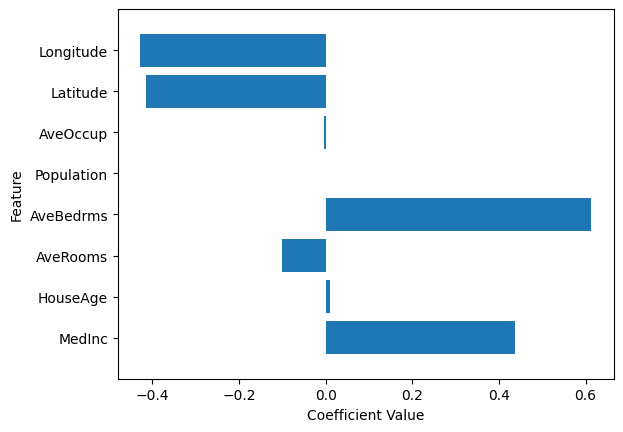

In [12]:
# Plot the coefficients
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align = 'center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(housing.feature_names), housing.feature_names)

In [13]:
# Calculate RMSE on the training set manually
p_train = linreg.predict(X_train) # Predict the target values
err_train = abs(p_train - y_train) # Calculate the absolute error
sum_sq_err_train = np.dot(err_train, err_train) # Calculate the sum of squared errors
rmse_train = np.sqrt(sum_sq_err_train / len(p_train)) # Calculate the RMSE
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.7213774431102036


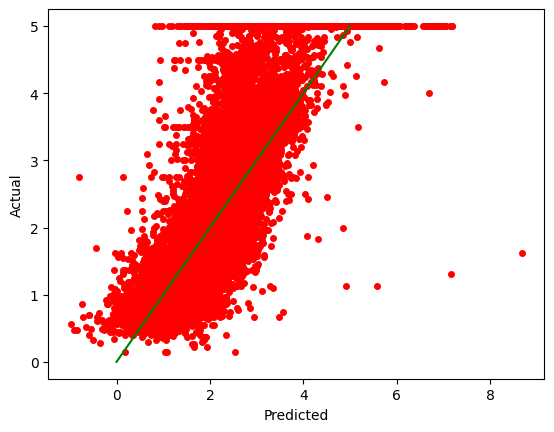

In [14]:
# Plot predicted against actual in testing set
pl.plot(p_train, y_train,'ro', markersize = 4)
pl.plot([0,5], [0,5], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [15]:
# Calculate RMSE on the testing set manually
p_test = linreg.predict(X_test) # Predict the target values
err_test = abs(p_test - y_test) # Calculate the absolute error
sum_sq_err_test = np.dot(err_test, err_test) # Calculate the sum of squared errors
rmse_test = np.sqrt(sum_sq_err_test / len(p_test)) # Calculate the RMSE
print("RMSE on Testing Data: ", rmse_test)

RMSE on Testing Data:  0.73523204335659


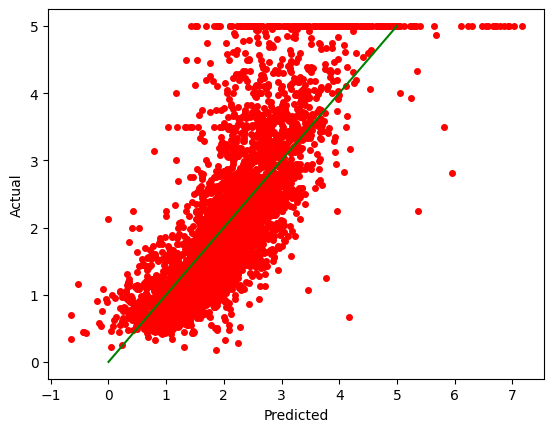

In [16]:
# Plot predicted against actual in testing set
pl.plot(p_test, y_test,'ro', markersize = 4)
pl.plot([0,5], [0,5], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [17]:
# Calculate RMSE on the training set with Scikit-learn
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
print("RMSE on Training Data: ", rmse_train)

# Calculate RMSE on the testing set with Scikit-learn
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print("RMSE on Testing Data: ", rmse_test)

# Calculate MAE on the training set with Scikit-learn
mae_train = mean_absolute_error(p_train, y_train)
print("MAE on Training Data: ", mae_train)

# Calculate MAE on the testing set with Scikit-learn 
mae_test = mean_absolute_error(p_test, y_test)
print("MAE on Testing Data: ", mae_test)

RMSE on Training Data:  0.7213774431102036
RMSE on Testing Data:  0.73523204335659
MAE on Training Data:  0.5299125726282204
MAE on Testing Data:  0.5355713790674047


In [18]:
def cross_validate(model, X, y, n, verbose = False):

    """
    Perform cross-validation on a regression model.
    
    Parameters:
    - model: Regression model to be trained
    - X: The training data matrix
    - y: The training target variable array
    - n: The number of folds
    - verbose: If true, print the RMSE for each fold
    
    Returns:
    - Average RMSE across all folds
    """
    
    kf = KFold(n_splits = n, random_state = 22, shuffle = True) # Initialize KFold cross-validator
    xval_err = 0 # Initialize cumulative error
    f = 1 # Initialize fold counter

    for train, test in kf.split(X):
        model.fit(X[train], y[train]) # Fit the model to the training partition
        p_test = model.predict(X[test]) # Apply trained model to test partition
        rmse_test = np.sqrt(mean_squared_error(p_test, y[test])) # Calculate RMSE
        
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
            
        xval_err += rmse_test
        f += 1

    return xval_err / n

In [19]:
# Compute the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(linreg, X_train, y_train, 10, verbose = True)
rmse_10cv

Fold  1 RMSE: 0.7111
Fold  2 RMSE: 0.6942
Fold  3 RMSE: 0.7432
Fold  4 RMSE: 0.7261
Fold  5 RMSE: 0.7179
Fold  6 RMSE: 0.6925
Fold  7 RMSE: 0.7409
Fold  8 RMSE: 0.7305
Fold  9 RMSE: 0.7689
Fold 10 RMSE: 0.7094


0.7234788419885064

In [20]:
# Compute the mean RMSE on 10-fold cross-validation with Scikit-learn
cv_scores = cross_val_score(linreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
print(np.sqrt(abs(cv_scores)))

[0.72 0.71 0.79 0.7  0.71 0.69 0.73 0.74 0.74 0.72]


In [21]:
# Calculate RMSE from Linear Regression
p_train = linreg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
p_test = linreg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

print('Method: %s' %'Linear Regression')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on testing: %.4f' %rmse_test)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Linear Regression
RMSE on training: 0.7215
RMSE on testing: 0.7351
RMSE on 10-fold CV: 0.7235


Ridge Regression

In [22]:
# Create Ridge regression model with alpha 0.5
ridge = Ridge(alpha = 0.5)

# Fit the model on the training set
ridge.fit(X_train, y_train)

# Predict the target values
p_train = ridge.predict(X_train)
p_test = ridge.predict(X_test)

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

# Compute the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(ridge, X_train, y_train, 10, verbose = True)

Fold  1 RMSE: 0.7112
Fold  2 RMSE: 0.6942
Fold  3 RMSE: 0.7432
Fold  4 RMSE: 0.7261
Fold  5 RMSE: 0.7179
Fold  6 RMSE: 0.6925
Fold  7 RMSE: 0.7409
Fold  8 RMSE: 0.7305
Fold  9 RMSE: 0.7688
Fold 10 RMSE: 0.7095


In [23]:
print('Method: %s' %'Ridge Regression')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on testing: %.4f' %rmse_test)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.7214
RMSE on testing: 0.7352
RMSE on 10-fold CV: 0.7235


In [24]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap')

alpha = np.linspace(0, 5, 100) # Generate a range of alpha values
t_rmse = np.array([]) # Array to hold training RMSE values
cv_rmse = np.array([]) # Array to hold cross-validated RMSE values

for a in alpha:

    ridge = Ridge(alpha = a) # Create Ridge regression model with current alpha
    ridge.fit(X_train, y_train) # Fit the model on training data
    p_train = ridge.predict(X_train) # Predict on the training set

    rmse_train = np.sqrt(mean_squared_error(p_train, y_train)) # Calculate training RMSE
    rmse_10cv = cross_validate(ridge, X_train, y_train, 10) # Perform cross-validation and calculate RMSE
    
    gap = rmse_10cv - rmse_train # Calculate the gap between cross-validated RMSE and training RMSE
    
    # Append RMSE values to array
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv, gap))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap
0.000	 0.7214		 0.7235		 0.0021
0.051	 0.7214		 0.7235		 0.0021
0.101	 0.7214		 0.7235		 0.0021
0.152	 0.7214		 0.7235		 0.0021
0.202	 0.7214		 0.7235		 0.0021
0.253	 0.7214		 0.7235		 0.0021
0.303	 0.7214		 0.7235		 0.0021
0.354	 0.7214		 0.7235		 0.0021
0.404	 0.7214		 0.7235		 0.0021
0.455	 0.7214		 0.7235		 0.0021
0.505	 0.7214		 0.7235		 0.0021
0.556	 0.7214		 0.7235		 0.0021
0.606	 0.7214		 0.7235		 0.0021
0.657	 0.7214		 0.7235		 0.0021
0.707	 0.7214		 0.7235		 0.0021
0.758	 0.7214		 0.7235		 0.0021
0.808	 0.7214		 0.7235		 0.0021
0.859	 0.7214		 0.7235		 0.0021
0.909	 0.7214		 0.7235		 0.0021
0.960	 0.7214		 0.7235		 0.0021
1.010	 0.7214		 0.7235		 0.0021
1.061	 0.7214		 0.7235		 0.0021
1.111	 0.7214		 0.7235		 0.0021
1.162	 0.7214		 0.7235		 0.0021
1.212	 0.7214		 0.7235		 0.0021
1.263	 0.7214		 0.7235		 0.0021
1.313	 0.7214		 0.7235		 0.0021
1.364	 0.7214		 0.7235		 0.0021
1.414	 0.7214		 0.7235		 0.0021
1.465	 0.7214		 0.723

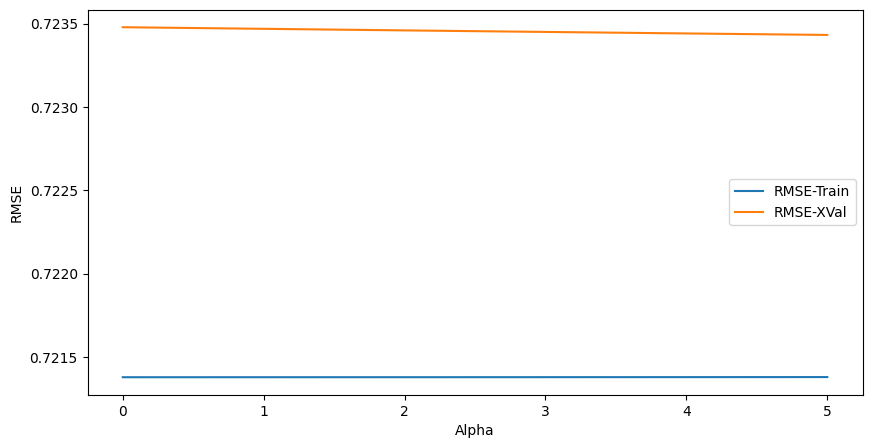

In [25]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label = 'RMSE-Train')
ax.plot(alpha, cv_rmse, label = 'RMSE-XVal')
pl.legend(('RMSE-Train', 'RMSE-XVal'))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [26]:
# Create Ridge regression model with alpha 0.25
ridge = Ridge(alpha = 0.25)

# Fit the model on the training set
ridge.fit(X_train, y_train)

# Predict the target values
p_train = ridge.predict(X_train)
p_test = ridge.predict(X_test)

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

# Compute the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(ridge, X_train, y_train, 10, verbose = True)

Fold  1 RMSE: 0.7112
Fold  2 RMSE: 0.6942
Fold  3 RMSE: 0.7432
Fold  4 RMSE: 0.7261
Fold  5 RMSE: 0.7179
Fold  6 RMSE: 0.6925
Fold  7 RMSE: 0.7409
Fold  8 RMSE: 0.7305
Fold  9 RMSE: 0.7688
Fold 10 RMSE: 0.7094


In [27]:
print('Method: %s' %'Ridge Regression')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on testing: %.4f' %rmse_test)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.7214
RMSE on testing: 0.7352
RMSE on 10-fold CV: 0.7235


Lasso Regression

In [28]:
# Create Ridge regression model with alpha 0.5
lasso = Lasso(alpha = 0.5)

# Fit the model on the training set
lasso.fit(X_train, y_train)

# Predict the target values
p_train = lasso.predict(X_train)
p_test = lasso.predict(X_test)

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

# Compute the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(lasso, X_train, y_train, 10, verbose = True)

Fold  1 RMSE: 0.8496
Fold  2 RMSE: 0.8323
Fold  3 RMSE: 0.8767
Fold  4 RMSE: 0.8514
Fold  5 RMSE: 0.8564
Fold  6 RMSE: 0.8170
Fold  7 RMSE: 0.8569
Fold  8 RMSE: 0.8525
Fold  9 RMSE: 0.8647
Fold 10 RMSE: 0.8309


In [29]:
print('Method: %s' %'Lasso Regression')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on testing: %.4f' %rmse_test)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Lasso Regression
RMSE on training: 0.8487
RMSE on testing: 0.8637
RMSE on 10-fold CV: 0.8488


In [30]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap')

alpha = np.linspace(0.0001, 0.004, 100) # Generate a range of alpha values
t_rmse = np.array([]) # Array to hold training RMSE values
cv_rmse = np.array([]) # Array to hold cross-validated RMSE values

for a in alpha:

    lasso = Lasso(alpha = a) # Create Lasso regression model with current alpha
    lasso.fit(X_train, y_train) # Fit the model on training data
    p_train = lasso.predict(X_train) # Predict on the training set

    rmse_train = np.sqrt(mean_squared_error(p_train, y_train)) # Calculate training RMSE
    rmse_10cv = cross_validate(lasso, X_train, y_train, 10) # Perform cross-validation and calculate RMSE
    
    gap = rmse_10cv - rmse_train # Calculate the gap between cross-validated RMSE and training RMSE
    
    # Append RMSE values to array
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv, gap))

Lasso Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap
0.000	 0.7214		 0.7235		 0.0021
0.000	 0.7214		 0.7235		 0.0021
0.000	 0.7214		 0.7235		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0020
0.000	 0.7214		 0.7234		 0.0020
0.000	 0.7214		 0.7234		 0.0020
0.000	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0019
0.001	 0.7214		 0.7234		 0.0019
0.001	 0.7214		 0.7234		 0.0019
0.001	 0.7214		 0.7234		 0.0019
0.001	 0.7214		 0.723

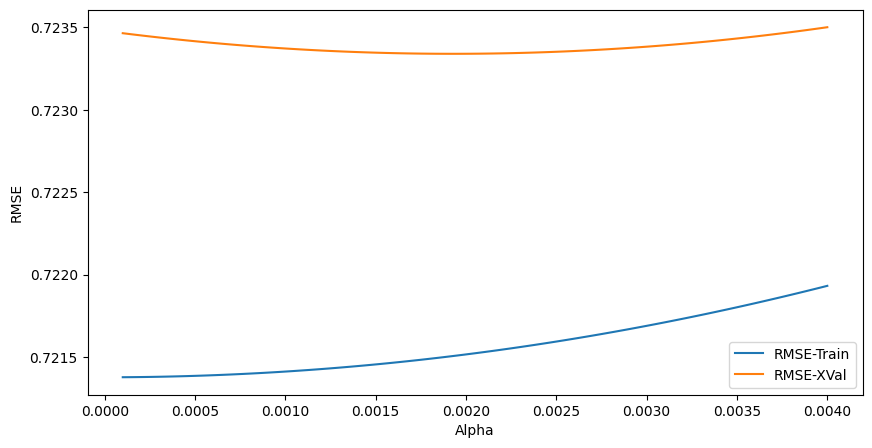

In [31]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label = 'RMSE-Train')
ax.plot(alpha, cv_rmse, label = 'RMSE-XVal')
pl.legend(('RMSE-Train', 'RMSE-XVal'))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

Elastic Net Regression

In [32]:
# Create an Elastic Net regression model with alpha 0.5, l1_ratio 0.5
elastic = ElasticNet(alpha = 0.5, l1_ratio = 0.5)

# Fit the model on the training set
elastic.fit(X_train, y_train)

# Predict the target values
p_train = elastic.predict(X_train)
p_test = elastic.predict(X_test)

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

# Compute the mean RMSE on 10-fold cross-validation
rmse_10cv = cross_validate(elastic, X_train, y_train, 10, verbose = True)

Fold  1 RMSE: 0.8258
Fold  2 RMSE: 0.8074
Fold  3 RMSE: 0.8510
Fold  4 RMSE: 0.8256
Fold  5 RMSE: 0.8272
Fold  6 RMSE: 0.7871
Fold  7 RMSE: 0.8360
Fold  8 RMSE: 0.8257
Fold  9 RMSE: 0.8391
Fold 10 RMSE: 0.8040


In [33]:
print('Method: %s' %'Elastic Net')
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on testing: %.4f' %rmse_test)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Elastic Net
RMSE on training: 0.8226
RMSE on testing: 0.8403
RMSE on 10-fold CV: 0.8229


In [34]:
print('Elastic Net Regression')
print('alpha\t RMSE_train\t RMSE_10cv\t Gap')

alpha = np.linspace(0.0001, 0.006, 100) # Generate a range of alpha values
t_rmse = np.array([]) # Array to hold training RMSE values
cv_rmse = np.array([]) # Array to hold cross-validated RMSE values

for a in alpha:

    elastic = ElasticNet(alpha = a, l1_ratio = 0.5) # Create Elastic Net regression model with current alpha
    elastic.fit(X_train, y_train) # Fit the model on training data
    p_train = elastic.predict(X_train) # Predict on the training set

    rmse_train = np.sqrt(mean_squared_error(p_train, y_train)) # Calculate training RMSE
    rmse_10cv = cross_validate(elastic, X_train, y_train, 10) # Perform cross-validation and calculate RMSE
    
    gap = rmse_10cv - rmse_train # Calculate the gap between cross-validated RMSE and training RMSE
    
    # Append RMSE values to array
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    
    print('{:.3f}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv, gap))

Elastic Net Regression
alpha	 RMSE_train	 RMSE_10cv	 Gap
0.000	 0.7214		 0.7235		 0.0021
0.000	 0.7214		 0.7235		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0021
0.000	 0.7214		 0.7234		 0.0020
0.000	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7234		 0.0020
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.001	 0.7214		 0.7233		 0.0019
0.002	 0.7214		 0.7233		 0.0019
0.002	 0.7214		 0.7233		 0.0019
0.002	 0.7214		 0.7233		 0.0019
0.002	 0.7214		 0.7233		 0.0019
0.002	 0.7214		 0.7233		 0.0019
0.002	 0.7214		

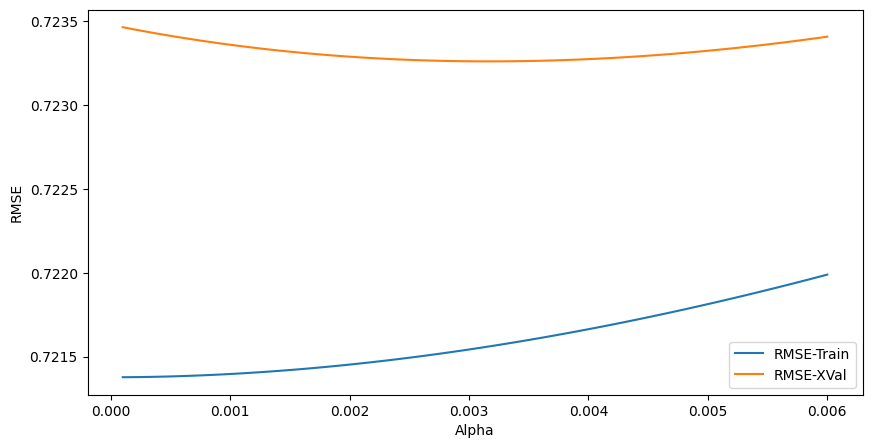

In [35]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label = 'RMSE-Train')
ax.plot(alpha, cv_rmse, label = 'RMSE-XVal')
pl.legend(('RMSE-Train', 'RMSE-XVal'))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()